
# Crash Data 

David Smith 



**YOUTUBE VIDEO LINK**

https://youtu.be/iIxuoh-Dc2c


<a href="#1" ><i>Jump to Assignment 2</i></a>


##  Notebook Logic Flow Control

This class is used to control the flow of the notebook. Set elements to tru that you wish to run. 

Note:  
Visualisations and other non-essential functions have been grouped under 'assignment_1_not_needed' as these do not need to be reviewed as a part of assignment 2. 

In [1]:

class FunctionsToRun: 
    ## Imports and Setups 
    import_data = True
    transform = True
    subset_data = True

    ## Run Relational Database Functions
    relational_data = False

    ## Run Neo4j Functions
    neo4j = True
    ## General info & Assignment 1
    assignment_1_not_needed = False

    ## Base true as place holder
    true = True
functions_to_run = FunctionsToRun()


## Setup Environnement

In [2]:
## Import Required Libraries
import os
import pandas as pd 
import geopandas
import numpy as np

## Import Graphics Libraries 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Setup Colour Scheme 
sns.set_palette("tab10")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", palette="pastel",  rc=custom_params)

## Allows for multiple outputs from cells without having to repeatedly write display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Set the size of the plots 
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # Note: 200 e.g. is really fine, but slower


# Crash Data Cleaning Pipeline 

1. Load and review data structure - ensure fields are matching and structure is the same. 
2. Enrich data
3. Check and log missing values 
4. Check and log duplicate values 
5. Clean and Enforce Standards 
6. load data into tables 


*Note: Unfortunately due to time, the meta data table has not being fully implemented.* 

In [3]:
if functions_to_run.assignment_1_not_needed:
    from IPython import display
    display.Image("./presentation/diagrams/4x/ETL@4x.png")

## Extract: Load Data

In [4]:
if functions_to_run.import_data:
    crash_gdf = geopandas.read_file("./data/Crash_Information_(Last_5_Years).shp")

    ## Data Meta data - throw exception if not input
    data_name = "Crash Infromation (Last 5 Years)"
    data_summary = "Crashes are recorded in the Integrated Road Information System (IRIS) and are provided for information only. The dataset provided is of crashes over the past 5 calendar years."
    link_to_data = "https://catalogue.data.wa.gov.au/dataset/mrwa-crash-information-last-5-years-"
    data_retieved = "2022-03-13"
    date_updated = "2020-11-11"
    published_by = "Main Roads Western Australia"
    data_license = "Creative Commons Attribution 4.0"


In [5]:
if functions_to_run.import_data:
    speed_gdf = geopandas.read_file("./data/Legal_Speed_Limits.shp")

    ## Data Meta data - throw exception if not input
    data_name = "Crash Infromation (Last 5 Years)"
    data_summary = "Crashes are recorded in the Integrated Road Information System (IRIS) and are provided for information only. The dataset provided is of crashes over the past 5 calendar years."
    link_to_data = "https://catalogue.data.wa.gov.au/dataset/mrwa-crash-information-last-5-years-"
    data_retieved = "2022-03-13"
    date_updated = "2020-11-11"
    published_by = "Main Roads Western Australia"
    data_license = "Creative Commons Attribution 4.0"

In [6]:
## Revie Data Shapes 
crash_gdf.shape
speed_gdf.shape

(132375, 24)

(67182, 18)

## Spatial Merge 



In [7]:
if functions_to_run.import_data:
    geo_merged_gdf = geopandas.sjoin_nearest(left_df= crash_gdf, right_df=speed_gdf, how="left" , max_distance=5)
    geo_merged_gdf.columns
    geo_merged_gdf.head(5)

c:\Users\david\anaconda3\envs\data_warehousing.venv\lib\site-packages\geopandas\array.py:341: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


Index(['OBJECTID_left', 'ACC_ID', 'ROAD_NO', 'ROAD_NAME_left', 'COMMON_ROA',
       'CWAY', 'SLK', 'INTERSECTI', 'INTERSEC_1', 'LONGITUDE', 'LATITUDE',
       'CRASH_DATE', 'CRASH_TIME', 'ACCIDENT_T', 'SEVERITY', 'EVENT_NATU',
       'EVENT_TYPE', 'TOTAL_BIKE', 'TOTAL_TRUC', 'TOTAL_HEAV', 'TOTAL_MOTO',
       'TOTAL_OTHE', 'TOTAL_PEDE', 'geometry', 'index_right', 'OBJECTID_right',
       'ROAD', 'ROAD_NAME_right', 'COMMON_USA', 'START_SLK', 'END_SLK', 'CWY',
       'START_TRUE', 'END_TRUE_D', 'NETWORK_TY', 'RA_NO', 'RA_NAME', 'LG_NO',
       'LG_NAME', 'SPEED_LIMI', 'ROUTE_NE_I', 'GEOLOCSTLe'],
      dtype='object')

,OBJECTID_left,ACC_ID,ROAD_NO,ROAD_NAME_left,COMMON_ROA,CWAY,SLK,INTERSECTI,INTERSEC_1,LONGITUDE,...,START_TRUE,END_TRUE_D,NETWORK_TY,RA_NO,RA_NAME,LG_NO,LG_NAME,SPEED_LIMI,ROUTE_NE_I,GEOLOCSTLe
0,33989666,9517411,1240038,William St,William St,S,1.020,050522,William St & Hay St,115.857020,...,0.00,1.53,Local Road,07,Metropolitan,124,Perth (C),40km/h,246091.0,0.014601
1,33989667,9517424,1260096,Henning Cr,Henning Cr,S,0.130,None,None,115.875138,...,0.00,0.96,Local Road,07,Metropolitan,126,South Perth (C),50km/h applies in built up areas or 110km/h ou...,219527.0,0.010143
2,33989668,9517437,1040027,Amherst Rd,Amherst Rd,S,0.090,None,None,115.942474,...,0.00,2.61,Local Road,07,Metropolitan,104,Gosnells (C),60km/h,201001.0,0.024912
3,33989669,9517443,H005,Great Eastern Hwy,Great Eastern Hwy,L,6.13,None,None,115.937801,...,1.83,6.77,State Road,07,Metropolitan,113,Belmont (C),60km/h,247651.0,0.049442
4,33989670,9517460,H032,South St,South St,L,7.76,047055,South St & Murdoch Dr,115.842203,...,0.00,3.89,Local Road,07,Metropolitan,119,Melville (C),70km/h,230074.0,0.035884


# Transform: Enrich Data


## Get Static Weather Data

In [8]:
if functions_to_run.import_data:
    ## Import bulk weather data
    perth_weather_gdf = pd.read_csv("./data/Weather_Data_Belmot_94610.csv")

    ## Ensure not nulls in data
    pattern = perth_weather_gdf.date.isna()
    perth_weather_gdf[pattern]

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun


### Fix data formatting 

In [9]:
if functions_to_run.import_data:
    ## Fix Date 
    fixed_dates = []

    for date in perth_weather_gdf.date:
        ## Split date into parts 
        ar = str(date).split("/")
        ## Add string padding 
        ar = [string.rjust(2, "0") for string in ar]
        ## Rejoin dates 
        out_string = "/".join(ar)
        fixed_dates.append(out_string)

    perth_weather_gdf.date = fixed_dates

### Merge Dataframes

In [10]:
if functions_to_run.import_data:
    ## Merge data on date
    merged_gdf = geo_merged_gdf.merge(perth_weather_gdf , how="left" , left_on="CRASH_DATE" , right_on="date") 

    ## Review data
    merged_gdf.columns
    merged_gdf.head(5)

Index(['OBJECTID_left', 'ACC_ID', 'ROAD_NO', 'ROAD_NAME_left', 'COMMON_ROA',
       'CWAY', 'SLK', 'INTERSECTI', 'INTERSEC_1', 'LONGITUDE', 'LATITUDE',
       'CRASH_DATE', 'CRASH_TIME', 'ACCIDENT_T', 'SEVERITY', 'EVENT_NATU',
       'EVENT_TYPE', 'TOTAL_BIKE', 'TOTAL_TRUC', 'TOTAL_HEAV', 'TOTAL_MOTO',
       'TOTAL_OTHE', 'TOTAL_PEDE', 'geometry', 'index_right', 'OBJECTID_right',
       'ROAD', 'ROAD_NAME_right', 'COMMON_USA', 'START_SLK', 'END_SLK', 'CWY',
       'START_TRUE', 'END_TRUE_D', 'NETWORK_TY', 'RA_NO', 'RA_NAME', 'LG_NO',
       'LG_NAME', 'SPEED_LIMI', 'ROUTE_NE_I', 'GEOLOCSTLe', 'date', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun'],
      dtype='object')

,OBJECTID_left,ACC_ID,ROAD_NO,ROAD_NAME_left,COMMON_ROA,CWAY,SLK,INTERSECTI,INTERSEC_1,LONGITUDE,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,33989666,9517411,1240038,William St,William St,S,1.020,050522,William St & Hay St,115.857020,...,18.3,13.5,24.9,1.4,NaN,203.0,20.4,NaN,NaN,NaN
1,33989667,9517424,1260096,Henning Cr,Henning Cr,S,0.130,None,None,115.875138,...,21.1,14.5,27.3,0.0,NaN,188.0,13.3,NaN,1013.9,NaN
2,33989668,9517437,1040027,Amherst Rd,Amherst Rd,S,0.090,None,None,115.942474,...,21.3,20.1,27.2,0.0,NaN,230.0,21.1,NaN,1012.1,NaN
3,33989669,9517443,H005,Great Eastern Hwy,Great Eastern Hwy,L,6.13,None,None,115.937801,...,26.3,21.4,35.0,0.0,NaN,141.0,14.7,NaN,1009.5,NaN
4,33989670,9517460,H032,South St,South St,L,7.76,047055,South St & Murdoch Dr,115.842203,...,23.9,10.2,32.1,0.0,NaN,163.0,13.7,NaN,1020.1,NaN


### Fill with station Id with default 

In [11]:
if functions_to_run.transform:
    ## Add in weather station id 
    merged_gdf["station_id"] =  ["94610" for x in range(len(merged_gdf))]

    ## Ensure weather data 
    merged_gdf[[ 'station_id', "date", "CRASH_DATE" , 'tavg','tmin', 'tmax', 'prcp','pres', ]].tail(5)

,station_id,date,CRASH_DATE,tavg,tmin,tmax,prcp,pres
132533,94610,11/12/2020,11/12/2020,26.1,23.7,32.3,0.0,1006.1
132534,94610,22/01/2017,22/01/2017,19.3,15.8,26.3,0.0,1010.3
132535,94610,17/01/2021,17/01/2021,29.3,18.7,36.1,0.0,1014.4
132536,94610,10/08/2018,10/08/2018,8.7,2.5,15.0,9.2,1026.3
132537,94610,03/09/2020,03/09/2020,16.1,7.2,20.0,2.2,1019.7


# Enrich Data: Get Weather Data From API



In [12]:
## uncomment out to run
# !pip install meteostat

## Functions to get weather data from crash

In [13]:
if functions_to_run.import_data:
    import time
    from datetime import datetime
    import matplotlib.pyplot as plt
    from meteostat import Point, Daily, Stations, Hourly
    from datetime import datetime

    def get_start_end_times(date_string :str, time: float):
        ## Get metrics from strings
        split_date = date_string.split('/')
        day = int(split_date[0])
        month = int(split_date[1])
        year = int(split_date[2])

        hour = round(time/100)
    
        # Set time period
        start = datetime(year, month, day, hour)
        end = datetime(year, month, day, hour )

        return start, end

    def get_start_end_dates(date_string :str):
        ## Get metrics from strings
        split_date = date_string.split('/')
        day = int(split_date[0])
        month = int(split_date[1])
        year = int(split_date[2])
        # Set time period
        start = datetime(year, month, day)
        end = datetime(year, month, day)
        return start, end    

    def get_weather_stn(x:float , y:float):
        # Get nearby weather stations
        stations = Stations()
        stations = stations.nearby(x , y)
        station = stations.fetch(1)
        return station

    def get_weather_data_hourly(station_id , start , end ):
        # Get hourly data
        data = Hourly(station_id ,start, end)
        try:
            data = data.fetch()
            if len(data) == 0:
                data.loc[0] = np.nan
            return data
        except Exception as e: print(e)

    def get_weather_data_daily(station_id , start , end ):
        # Get hourly data
        data = Daily(station_id ,start, end)
        try:
            data = data.fetch()
            if len(data) == 0:
                data.loc[0] = np.nan
            return data
        except Exception as e: print(e)

    def get_weather_from_crash(x , y, date_string :str, time_string: str , sleep = True , daily = True):
        ## Ensure it does not overload the API
        if sleep:
            time.sleep(0.25)
        ## Get the Weather Station Meta Data
        station = get_weather_stn(float(x) , float(y))
        ## Get the station id
        stn_id = station.wmo[0]
        ## Fetch the Weather data at this station at this time
        if daily:
            ## Get the start and end times from strings
            start , end = get_start_end_dates(date_string)
            weather_df = get_weather_data_daily(stn_id , start, end)
        else:
            ## Get the start and end times from strings
            start , end = get_start_end_times(date_string , time_string)
            weather_df = get_weather_data_hourly(stn_id , start, end)
        return station , weather_df


## Get Weather data for cells and create matching dataframes 

### Get Data for Daily Grain

In [14]:
if functions_to_run.transform:
    ## Create dataframes for weather data 
    station_dfs = pd.DataFrame()
    weather_dfs = pd.DataFrame()

    ## iterate through subset of data
    for i , row in merged_gdf.tail(10).iterrows():
        ## Get data from rows
        x = row.LATITUDE
        y = row.LONGITUDE
        date_string = row.CRASH_DATE
        time_string = row.CRASH_TIME

        ## Get weather data and station from API and input data 
        station_df , weather_df = get_weather_from_crash(x , y, date_string , time_string )

        ## Insert values 
        for col in weather_df.columns:
            merged_gdf.loc[i, col] = weather_df[col].values    
        merged_gdf.loc[i, "weather_id"] = str(station_df.index.values[0] +"_"+ date_string)
        merged_gdf.loc[i, "station_id"] = str(station_df.index.values[0])

        ## Join the data frames 
        station_dfs = pd.concat([station_dfs, station_df])
        weather_dfs = pd.concat([weather_dfs, weather_df])



In [15]:
## Review Weather Data has merged correctly 
merged_gdf[['station_id', "weather_id", "date", "CRASH_DATE" , 'tavg', 'tmin', 'tmax', 'prcp','pres', ]].tail(5)

,station_id,weather_id,date,CRASH_DATE,tavg,tmin,tmax,prcp,pres
132533,94608,94608_11/12/2020,11/12/2020,11/12/2020,28.1,23.1,33.1,0.0,1006.1
132534,95612,95612_22/01/2017,22/01/2017,22/01/2017,NaN,16.0,25.5,0.0,NaN
132535,94614,94614_17/01/2021,17/01/2021,17/01/2021,28.3,19.9,36.3,0.0,1014.5
132536,94608,94608_10/08/2018,10/08/2018,10/08/2018,9.4,3.2,14.8,11.2,1026.1
132537,94605,94605_03/09/2020,03/09/2020,03/09/2020,NaN,14.4,19.6,1.0,NaN


### Create Perth Weather Station Dataframe

In [16]:
if functions_to_run.transform:
    ## Drop duplicate stations 
    station_dfs.drop_duplicates(subset=['name'] , inplace=True)
    station_dfs.reset_index(inplace=True) 
    station_dfs.head(10)

    PerthAirport = dict({ "station_id":"94610", "station_name":"Perth Airport", "country":"AU", "region":"WA", "elevation":"20", "longitude":"115.95", "latitude":"-31.9333"})
    station_dfs = station_dfs.append(pd.DataFrame([PerthAirport]))

,id,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
0,95604,Gosnells,AU,WA,95604,<NA>,-32.0,116.0,10.0,Australia/Perth,NaT,NaT,1750-02-02,2022-05-01,1961-01-01,2020-01-01,8355.013929
1,94608,Perth,AU,WA,94608,<NA>,-31.9,115.9,25.0,Australia/Perth,NaT,NaT,1750-02-01,2022-05-05,1993-01-01,2022-01-01,5095.812224
2,95607,Garden Island,AU,WA,95607,YGAD,-32.2,115.7,15.0,Australia/Perth,NaT,NaT,1750-02-01,2022-05-04,2002-01-01,2022-01-01,8562.153167
3,95612,Gingin Airport,AU,WA,95612,<NA>,-31.5,115.9,74.0,Australia/Perth,NaT,NaT,1750-02-01,2022-05-04,1996-01-01,2022-01-01,23921.448614
4,94614,Swanbourne,AU,WA,94614,<NA>,-32.0,115.8,20.0,Australia/Perth,NaT,NaT,1750-02-01,2022-05-04,1993-01-01,2022-01-01,7772.591528
5,94605,Mandurah,AU,WA,94605,<NA>,-32.5,115.7,21.0,Australia/Perth,NaT,NaT,1750-02-01,2022-05-04,2001-01-01,2022-01-01,6743.511195


# Enrich Data: Add Extra Data Columns

In [17]:
if functions_to_run.transform:
    #is_peak_hour
    def check_for_peak(time: float):
        if 730 < time < 930:
            return  1
        elif 1600 < time < 1800:
            return 1
        return 0

    merged_gdf["is_peak_hour"] = [check_for_peak(time) for time in merged_gdf["CRASH_TIME"] ]

    ## Create Date Variables
    import datetime as dt

    ## Converts string to datetime stamp 
    def convert_date_stamp(date: str):
        d_split = list(map(int , date.split("/")))
        dt_date = dt.date( d_split[2] , d_split[1],  d_split[0],  )
        date_stamp = pd.Timestamp(dt_date)
        return date_stamp

    ## Run this function to get datatime 
    date_stamps = [convert_date_stamp(date) for date in merged_gdf["CRASH_DATE"] ]

    ## Extract and input data values 
    merged_gdf["quarter"] = [stamp.quarter  for stamp in date_stamps]
    merged_gdf["year"]  = [stamp.year  for stamp in date_stamps]
    merged_gdf["month"]  = [str(stamp.month).rjust(2, "0")  for stamp in date_stamps]
    merged_gdf["day"]  = [  str(stamp.day).rjust(3, "0")  for stamp in date_stamps]
    merged_gdf["day_of_week"]  = [stamp.day_name()  for stamp in date_stamps]
    merged_gdf["date"]  = [stamp.isoformat().split("T")[0] for stamp in date_stamps]

    ## Review insersion 
    merged_gdf[["year", "month", "day" , "day_of_week", "quarter"  , "date"]].head(5)

    # distance 
    merged_gdf["distance"] = [ None for distance in merged_gdf["station_id"] ]

    ## Create generated keys 
    merged_gdf["weather_id"] = [str(stn) + "_" + str(date) for stn , date in merged_gdf[[  "station_id" ,  "date" ]].values]

    #is_intersection
    merged_gdf["is_intersection"] = [ 1 if isnull else 0 for isnull in merged_gdf["INTERSECTI"].isnull() ]


,year,month,day,day_of_week,quarter,date
0,2017,03,015,Wednesday,1,2017-03-15
1,2017,03,024,Friday,1,2017-03-24
2,2017,02,020,Monday,1,2017-02-20
3,2017,03,008,Wednesday,1,2017-03-08
4,2017,02,023,Thursday,1,2017-02-23


# Transform: Create Natural Keys 

In [18]:
if functions_to_run.transform:
    ## location_id
    merged_gdf["location_id"] = [str(road) + "_" + str(inter) for road  , inter in merged_gdf[[ "ROAD_NO", "INTERSECTI"  ]].values]

    ## event_id
    merged_gdf["event_id"] = range(len(merged_gdf))



## Rename Columns with Dictionary Mapping 

In [19]:
if functions_to_run.transform:
    ## Column naming dictionary 
    column_mapping = dict({
    'ACC_ID' : "crash_id", 
    'ROAD_NO' : "road_id", 
    'ROAD_NAME_left' : "road_name", 
    'COMMON_ROA' : "common_road_name",
    'CWAY' : "cway", 
    'INTERSECTI' : "intersection_no", 
    'INTERSEC_1' : "intersection_desc", 
    'LONGITUDE' : "longitude", 
    'LATITUDE' : "latitude",
    'CRASH_TIME' : "time_id", 
    'SEVERITY' : "severity", 
    'EVENT_NATU' : "event_nature",
    'EVENT_TYPE' : "event_type", 
    'TOTAL_BIKE' : "total_bike_involved", 
    'TOTAL_TRUC' : "total_truck_involved", 
    'TOTAL_HEAV' : "total_heavy_truck_involved", 
    'TOTAL_MOTO' : "total_motor_cycle_involved",
    'TOTAL_OTHE' : "total_other_vehicles_involved", 
    'TOTAL_PEDE' : "total_pedestrians_involve", 
    'NETWORK_TY' : "network_type", 
    'RA_NO' : "region_id", 
    'RA_NAME' : "region_name", 
    'LG_NO' : "lga_id",
    'LG_NAME' : "local_gov_name", 
    'SPEED_LIMI' : "speed_limit", 
    'date' : "date_id", 
    'tavg' : "temp_ave",
    'tmin' : "temp_min", 
    'tmax' : "temp_max", 
    'prcp' : "precipitation_mm", 
    'wdir' : "wind_direction", 
    'wspd' : "wind_speed", 
    'pres' : "pressure", 
    'station_id' : "station_id",
    })

    def rename_columns(df: pd.DataFrame):
        return df.rename(columns=column_mapping)

    df = rename_columns(merged_gdf )
    merged_df = pd.DataFrame(df)

    ## Weather Stn Data Mapping 
    merged_df.head(5)

,OBJECTID_left,crash_id,road_id,road_name,common_road_name,cway,SLK,intersection_no,intersection_desc,longitude,...,is_peak_hour,quarter,year,month,day,day_of_week,distance,is_intersection,location_id,event_id
0,33989666,9517411,1240038,William St,William St,S,1.020,050522,William St & Hay St,115.857020,...,1,1,2017,03,015,Wednesday,None,0,1240038_050522,0
1,33989667,9517424,1260096,Henning Cr,Henning Cr,S,0.130,None,None,115.875138,...,0,1,2017,03,024,Friday,None,1,1260096_None,1
2,33989668,9517437,1040027,Amherst Rd,Amherst Rd,S,0.090,None,None,115.942474,...,0,1,2017,02,020,Monday,None,1,1040027_None,2
3,33989669,9517443,H005,Great Eastern Hwy,Great Eastern Hwy,L,6.13,None,None,115.937801,...,1,1,2017,03,008,Wednesday,None,1,H005_None,3
4,33989670,9517460,H032,South St,South St,L,7.76,047055,South St & Murdoch Dr,115.842203,...,0,1,2017,02,023,Thursday,None,0,H032_047055,4


## Rename Weather Data

In [20]:
if functions_to_run.transform:
    ## Renaming key value pairs 
    stn_rename = {
        "id":"station_id",
        "name":"station_name",
        "hourly_start":"hourly_start_date",
        "hourly_end":"hourly_end_date",
        "daily_start":"daily_start_date",
        "daily_end":"daily_end_date",
        "monthly_start":"monthly_start_date",
        "monthly_end":"monthly_end_date",
    }

    station_dfs.rename(columns=stn_rename, inplace=True)
    station_dfs

,station_id,station_name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start_date,hourly_end_date,daily_start_date,daily_end_date,monthly_start_date,monthly_end_date,distance,station_id,station_name
0,95604,Gosnells,AU,WA,95604,<NA>,-32.0,116.0,10.0,Australia/Perth,NaT,NaT,1750-02-02,2022-05-01,1961-01-01,2020-01-01,8355.013929,NaN,NaN
1,94608,Perth,AU,WA,94608,<NA>,-31.9,115.9,25.0,Australia/Perth,NaT,NaT,1750-02-01,2022-05-05,1993-01-01,2022-01-01,5095.812224,NaN,NaN
2,95607,Garden Island,AU,WA,95607,YGAD,-32.2,115.7,15.0,Australia/Perth,NaT,NaT,1750-02-01,2022-05-04,2002-01-01,2022-01-01,8562.153167,NaN,NaN
3,95612,Gingin Airport,AU,WA,95612,<NA>,-31.5,115.9,74.0,Australia/Perth,NaT,NaT,1750-02-01,2022-05-04,1996-01-01,2022-01-01,23921.448614,NaN,NaN
4,94614,Swanbourne,AU,WA,94614,<NA>,-32.0,115.8,20.0,Australia/Perth,NaT,NaT,1750-02-01,2022-05-04,1993-01-01,2022-01-01,7772.591528,NaN,NaN
5,94605,Mandurah,AU,WA,94605,<NA>,-32.5,115.7,21.0,Australia/Perth,NaT,NaT,1750-02-01,2022-05-04,2001-01-01,2022-01-01,6743.511195,NaN,NaN
0,<NA>,NaN,AU,WA,<NA>,<NA>,-31.9333,115.95,20,<NA>,NaT,NaT,NaT,NaT,NaT,NaT,NaN,94610,Perth Airport


# Transform: Data Quality and Cleaning


In [21]:
if functions_to_run.transform:
    def replace_string(string):
        station_dfs[string] = station_dfs[string].fillna("Null")
        station_dfs[string] = [stamp.isoformat().split("T")[0] if str(stamp) != "Null" and type(stamp) != str else stamp for stamp in station_dfs[string]]

    ## Replace 0s
    station_dfs.replace(0 , None)

    ## Replace None with Null strings 
    strings = ["hourly_start_date","hourly_end_date","daily_start_date","daily_end_date","monthly_start_date","monthly_end_date"]
    for string in strings:
        replace_string(string)

    ## Remove all ' from strings 
    def replace_string(string):
        merged_df[string] = [s.replace("'" , " ") if s != None else None for s in merged_df[string]]

    strings = ["road_name","common_road_name","intersection_no",  "intersection_desc" ]
    for string in strings:
        replace_string(string)

    merged_df.head(10)

    ## Clean Speed Variable 
    def clean_speed_vars(df:pd.DataFrame):
        val_to_replace =   '50km/h applies in built up areas or 110km/h outside built up areas'
        val_to_replace_with =   '110km/h or 50km/h built up areas'

        df["speed_limit"] = [val_to_replace_with  if speed == val_to_replace else speed for speed in df["speed_limit"]]
        return df

    clean_speed_vars(merged_df)

,station_id,station_name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start_date,hourly_end_date,daily_start_date,daily_end_date,monthly_start_date,monthly_end_date,distance,station_id,station_name
0,95604,Gosnells,AU,WA,95604,<NA>,-32.0,116.0,10.0,Australia/Perth,NaT,NaT,1750-02-02,2022-05-01,1961-01-01,2020-01-01,8355.013929,NaN,NaN
1,94608,Perth,AU,WA,94608,<NA>,-31.9,115.9,25.0,Australia/Perth,NaT,NaT,1750-02-01,2022-05-05,1993-01-01,2022-01-01,5095.812224,NaN,NaN
2,95607,Garden Island,AU,WA,95607,YGAD,-32.2,115.7,15.0,Australia/Perth,NaT,NaT,1750-02-01,2022-05-04,2002-01-01,2022-01-01,8562.153167,NaN,NaN
3,95612,Gingin Airport,AU,WA,95612,<NA>,-31.5,115.9,74.0,Australia/Perth,NaT,NaT,1750-02-01,2022-05-04,1996-01-01,2022-01-01,23921.448614,NaN,NaN
4,94614,Swanbourne,AU,WA,94614,<NA>,-32.0,115.8,20.0,Australia/Perth,NaT,NaT,1750-02-01,2022-05-04,1993-01-01,2022-01-01,7772.591528,NaN,NaN
5,94605,Mandurah,AU,WA,94605,<NA>,-32.5,115.7,21.0,Australia/Perth,NaT,NaT,1750-02-01,2022-05-04,2001-01-01,2022-01-01,6743.511195,NaN,NaN
0,<NA>,NaN,AU,WA,<NA>,<NA>,-31.9333,115.95,20,<NA>,NaT,NaT,NaT,NaT,NaT,NaT,NaN,94610,Perth Airport


,OBJECTID_left,crash_id,road_id,road_name,common_road_name,cway,SLK,intersection_no,intersection_desc,longitude,...,is_peak_hour,quarter,year,month,day,day_of_week,distance,is_intersection,location_id,event_id
0,33989666,9517411,1240038,William St,William St,S,1.020,050522,William St & Hay St,115.857020,...,1,1,2017,03,015,Wednesday,None,0,1240038_050522,0
1,33989667,9517424,1260096,Henning Cr,Henning Cr,S,0.130,None,None,115.875138,...,0,1,2017,03,024,Friday,None,1,1260096_None,1
2,33989668,9517437,1040027,Amherst Rd,Amherst Rd,S,0.090,None,None,115.942474,...,0,1,2017,02,020,Monday,None,1,1040027_None,2
3,33989669,9517443,H005,Great Eastern Hwy,Great Eastern Hwy,L,6.13,None,None,115.937801,...,1,1,2017,03,008,Wednesday,None,1,H005_None,3
4,33989670,9517460,H032,South St,South St,L,7.76,047055,South St & Murdoch Dr,115.842203,...,0,1,2017,02,023,Thursday,None,0,H032_047055,4
5,33989671,9517471,1313303,Grand Bvd,Grand Bvd,L,1.080,067855,Boas Av & Grand Bvd,115.769956,...,0,1,2017,03,008,Wednesday,None,0,1313303_067855,5
6,33989672,9517484,1180012,Elder Pl,Elder Pl,S,0.210,None,None,115.747164,...,0,1,2017,02,027,Monday,None,1,1180012_None,6
7,33989673,9517492,H012,Leach Hwy,Leach Hwy,L,18.46,004456,Leach Hwy & Welshpool Rd,115.929167,...,1,1,2017,03,002,Thursday,None,0,H012_004456,7
8,33989674,9517498,8140653,Dampier Rd,Dampier Rd,L,0.000,008501,Millstream Rd & Dampier Rd & De Witt Rd,116.848394,...,1,1,2017,03,010,Friday,None,0,8140653_008501,8
9,33989675,9517504,1140265,Liege St,Liege St,S,0.600,None,None,115.940769,...,1,1,2017,02,026,Sunday,None,1,1140265_None,9


,OBJECTID_left,crash_id,road_id,road_name,common_road_name,cway,SLK,intersection_no,intersection_desc,longitude,...,is_peak_hour,quarter,year,month,day,day_of_week,distance,is_intersection,location_id,event_id
0,33989666,9517411,1240038,William St,William St,S,1.020,050522,William St & Hay St,115.857020,...,1,1,2017,03,015,Wednesday,None,0,1240038_050522,0
1,33989667,9517424,1260096,Henning Cr,Henning Cr,S,0.130,None,None,115.875138,...,0,1,2017,03,024,Friday,None,1,1260096_None,1
2,33989668,9517437,1040027,Amherst Rd,Amherst Rd,S,0.090,None,None,115.942474,...,0,1,2017,02,020,Monday,None,1,1040027_None,2
3,33989669,9517443,H005,Great Eastern Hwy,Great Eastern Hwy,L,6.13,None,None,115.937801,...,1,1,2017,03,008,Wednesday,None,1,H005_None,3
4,33989670,9517460,H032,South St,South St,L,7.76,047055,South St & Murdoch Dr,115.842203,...,0,1,2017,02,023,Thursday,None,0,H032_047055,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132533,34122036,10374579,H016,Mitchell Fwy,Mitchell Fwy,L,14.47,None,None,115.798060,...,0,4,2020,12,011,Friday,None,1,H016_None,132533
132534,34122037,9483262,1105314,Dekle L,Dekle L,S,0.110,None,None,115.717791,...,0,1,2017,01,022,Sunday,None,1,1105314_None,132534
132535,34122038,10391332,1280464,Sweetapple L,Sweetapple L,S,0.240,None,None,115.819402,...,0,1,2021,01,017,Sunday,None,1,1280464_None,132535
132536,34122039,9843922,H016,Mitchell Fwy,Mitchell Fwy,L,24.88,None,None,115.769444,...,1,3,2018,08,010,Friday,None,1,H016_None,132536


## Check for Null Values 

### Check for Nulls & Add to Meta Tables 

In [22]:
if functions_to_run.assignment_1_not_needed:
    import math
    import matplotlib.pyplot as plt

    ## Check for nulls in the dataframe
    def review_nulls(df: pd.DataFrame):
        if df.isnull().sum().sum() != 0:
            na_df = (df.isnull().sum() / len(df)) * 100      
            na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
            return pd.DataFrame({'Missing Ratio %' :na_df})
        else:
            return pd.DataFrame()

    ## Create null plot
    def plot_nas(missing_data: pd.DataFrame):
            g = missing_data.plot(kind = "barh")
            g.set_title("Ratio of Missing Data by Variable", fontsize=18)
            index = 0
            for i, row in missing_data.iterrows():
                txt = "{1}%".format(i, round(row[0] , 2))
                loc = row[0]         
                ## add annotations 
                g.text(
                    loc + 3 , 
                    index  , 
                    txt ,  
                    fontdict=dict(color='black', fontsize=12), 
                    horizontalalignment='center' 
                )
                index += 1
            plt.show()

    ## Get Missing Data 
    missing_data = review_nulls(crash_gdf) 
    missing_data.head(5)  ## NOTE: this would be added to the meta data table 
    
    if functions_to_run.assignment_1_not_needed:
    ## Plot Missing Dta 
        if len(missing_data) != 0:
            plot_nas(missing_data)

## Check for Duplicates 

In [23]:
if functions_to_run.assignment_1_not_needed:
    ## Duplicate Counts 
    len(crash_gdf["OBJECTID"])-len(crash_gdf["OBJECTID"].drop_duplicates())
    len(crash_gdf["ACC_ID"])-len(crash_gdf["ACC_ID"].drop_duplicates())
    len(crash_gdf)-len(crash_gdf.drop_duplicates())

In [24]:
if functions_to_run.assignment_1_not_needed:
    def review_dups(df: pd.DataFrame):
        if len(df)-len(df.drop_duplicates()) != 0:
            na_df = (df.duplicated().sum() / len(df)) * 100      
            na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
            return pd.DataFrame({'Missing Ratio %' :na_df})
        else:
            return pd.DataFrame()


    def plot_dups(missing_data: pd.DataFrame):
            ## Plot of training testing split 
            g = missing_data.plot(kind = "barh")
            g.set_title("Ratio of Missing Data by Variable", fontsize=18)
            index = 0
            for i, row in missing_data.iterrows():
                txt = "{1}%".format(i, round(row[0] , 2))
                loc = row[0]         
                g.text(
                    loc + 3 , 
                    index  , 
                    txt ,  
                    fontdict=dict(color='black', fontsize=12), 
                    horizontalalignment='center' 
                )
                index += 1
            plt.show()


    dup_data = review_dups(crash_gdf)
    if len(dup_data ) != 0:
        plot_dups(dup_data)

# Python SQL Server 

## Setup Environment 

In [25]:
## uncomment out to run
# !pip install pyodbc

### Connect To SQL Server

In [52]:
import pyodbc 
server = r'DESKTOP-77V87AM\UWA_DW' 
database = r'crash_data' 
conn = pyodbc.connect(r'Driver={SQL Server};' 
                    r'Server='+server+
                    r';Database='+database+
                    r';Trusted_Connection=yes;')
conn.setdecoding(pyodbc.SQL_CHAR, encoding='latin1')
conn.setencoding('latin1')
# cursor = conn.cursor()

### Create Tables Functions

function to create table from dataframe & Output SQL Query 

In [55]:
if functions_to_run.true:
    ## Utility functions 
    def to_raw(string):
        return fr"{string}"

    def export_sql_query(table_name , query_string):
        with open("./sql_queries/Create_Table_{0}.sql".format(table_name), "w") as text_file:
            print(query_string, file=text_file)

    def create_table_query_builder(table_name: str , column_strings: list):
        string_array = []
        for strings in column_strings:
            string_array.append("\t" + " ".join(strings) + ",")
        column_string = "\n".join(string_array)
        out_string = "CREATE TABLE {0} (\n {1}\n);".format(table_name , column_string)
        return to_raw(out_string)

    def create_table(connection , query_string , table_name):
        try:
            cursor = connection.cursor()  
            cursor.execute(query_string)
            print("Created {0} Tables".format(table_name))
            connection.commit()
            ## Write query to file if it succeeds 
            export_sql_query(table_name , query_string)
        except:
            print("{0} table may already exist".format(table_name))

    def create_table_function(connection , table_name: str , column_strings: list):
        query_string = create_table_query_builder(table_name, column_strings)
        response = create_table(connection , query_string , table_name)
        print(response)


### SQL Data Ingestion Functions

In [53]:

def create_sql_insert_string():
    print("create_sql_insert_string not implemented")

def export_sql_insert_query(table_name , query_string):
    with open("./sql_queries/Insert_Data_{0}.sql".format(table_name), "w") as text_file:
        print(query_string, file=text_file)

def insert_data_query_builder(table_name: str , df: pd.DataFrame , connection):
    df = df.fillna("NULL")
    columns = " , ".join([column for column in df.columns])
    out_strings = []
    for records in df.to_records(index=False):
        values = str(records)
        values = str(records).replace("'NULL'" , "NULL")
        query = "INSERT INTO {0} ({1}) VALUES {2}".format(table_name , columns , values )
        out_string = insert_data(connection , query , table_name )
        if out_string != None:
            out_strings.append(out_string)
    if len(out_strings) > 0 :
        print("\n".join(out_strings[:5]))

def insert_data(connection , insert_string ,  table_name ):
    ## insert values into database 
    cursor = connection.cursor()
    try:
        # Insert Dataframe into SQL Server:
        cursor.execute(insert_string)
        connection.commit()
        cursor.close()
        return None
    except Exception as e:
            connection.commit()
            cursor.close()
            return"Insert Failed: {0} | {1}".format(table_name , e) 
        
def insert_dim_values(connection, table_name:str , df: pd.DataFrame , table_data ):
    print("----------- {0} ----------".format(table_name))
    ## Filter dataframe to only values
    df = df[[input[0] for input in table_data if str(input[0]).find("FOREIGN KEY") == -1]]
    ## Remove Duplicates 
    df.drop_duplicates(inplace=True , subset=table_data[0][0])
    df.to_csv("./csv/{0}.csv".format(table_name))
    insert_data_query_builder(table_name , df ,  connection)

def insert_fact_values(connection, table_name:str , df: pd.DataFrame , table_data ):
    print("----------- {0} ----------".format(table_name))
    ## Filter dataframe to only values
    df = df[[input[0] for input in table_data if str(input[0]).find("FOREIGN KEY") == -1]]
    df.to_csv("./csv/{0}.csv".format(table_name))
    insert_data_query_builder(table_name , df ,  connection)

In [29]:
if functions_to_run.relational_data:
    ######################### Dimensions #########################
    ## Date Dimension
    table_data = [
        ["date_id", "varchar(50) primary key", "NOT NULL"],
        ["year", "int", "NOT NULL"],
        ["month", "varchar(50)", "NOT NULL"],
        ["day", "varchar(50)", "NOT NULL"],
        ["quarter", "int", "NOT NULL"],
        ["day_of_week", "varchar(16)", "NOT NULL"],
        # ["is_holiday", "BIT DEFAULT 0", "NOT NULL"], ## Not Implemented
    ]
    create_table_function(conn, "DimDate", table_data)
    insert_dim_values(conn,  "DimDate", merged_df, table_data)

    ## Event description
    table_data = [
        ["event_id", "varchar(50) primary key", "NOT NULL"],
        ["event_nature", "varchar(50)"],
        ["event_type", "varchar(50)"],
        ["severity", "varchar(50)"],
        ["longitude", "float(24)"],
        ["latitude", "float(24)"],
    ]
    create_table_function(conn, "DimEventDesc", table_data)
    insert_dim_values(conn,  "DimEventDesc", merged_df, table_data)

    ## Weather Station Dimension
    table_data = [
        ["station_id", "varchar(50) primary key", "NOT NULL"],
        ["station_name", "varchar(100)", "NOT NULL"],
        ["country", "varchar(50)", "NOT NULL"],
        ["region", "varchar(50)", "NOT NULL"],
        ["elevation", "int"],
        ["daily_start_date", "varchar(50)"],
        ["daily_end_date", "varchar(50)"],
        ["longitude", "float(24)"],
        ["latitude", "float(24)"],
    ]
    create_table_function(conn, "DimWeatherStn", table_data)
    insert_dim_values(conn,  "DimWeatherStn", station_dfs, table_data)

    ## Road
    table_data = [
        ["road_id", "varchar(50) primary key", "NOT NULL"],
        ["road_name", "varchar(500)", "NOT NULL"],
        ["common_road_name", "varchar(500)"],
        ["cway", "varchar(50)"],
        ["speed_limit", "varchar(100)"],
        ["network_type", "varchar(50)"],
    ]
    create_table_function(conn, "DimRoad", table_data)
    insert_dim_values(conn,  "DimRoad", merged_df, table_data)

    ## LGA
    table_data = [
        ["lga_id", "varchar(50) primary key", "NOT NULL"],
        ["local_gov_name", "varchar(100)", "NOT NULL"],
    ]
    create_table_function(conn, "DimLGA", table_data)
    insert_dim_values(conn,  "DimLGA", merged_df, table_data)

    ## Region
    table_data = [
        ["region_id", "varchar(50) primary key", "NOT NULL"],
        ["region_name", "varchar(100)", "NOT NULL"],
    ]
    create_table_function(conn, "DimRegion", table_data)
    insert_dim_values(conn,  "DimRegion", merged_df, table_data)

    ## Location
    table_data = [
        ["location_id", "varchar(50) primary key", "NOT NULL"],
        ["road_id", "varchar(50)", "NOT NULL"],
        ["lga_id", "varchar(50)", "NOT NULL"],
        ["region_id", "varchar(50)", "NOT NULL"],
        ["is_intersection", "BIT DEFAULT 0", "NOT NULL"],
        ["intersection_no", "int"],
        ["intersection_desc", "varchar(500)"],
        ["FOREIGN KEY (road_id) REFERENCES DimRoad(road_id)"],
        ["FOREIGN KEY (lga_id) REFERENCES DimLGA(lga_id)"],
        ["FOREIGN KEY (region_id) REFERENCES DimRegion(region_id)"],
    ]
    create_table_function(conn, "DimLocation", table_data)
    insert_dim_values(conn,  "DimLocation", merged_df, table_data)

    ## Time Fact
    table_data = [
        ["time_id", "varchar(50) primary key", "NOT NULL"],
        ["is_peak_hour", "BIT DEFAULT 0", "NOT NULL"],
    ]
    create_table_function(conn, "DimTime", table_data)
    insert_dim_values(conn,  "DimTime", merged_df, table_data)

    ######################### Fact Tables #########################
    ## Weather Fact Table
    table_data = [
        ["weather_id", "varchar(50) primary key", "NOT NULL"],
        ["date_id", "varchar(50)", "NOT NULL"],
        ["station_id", "varchar(50)", "NOT NULL"],
        ["temp_min", "float"],
        ["temp_ave", "float"],
        ["temp_max", "float"],
        ["precipitation_mm", "float"],
        ["wind_direction", "float"],
        ["wind_speed", "float"],
        ["pressure", "float"],
        ["distance", "int"],
        ["FOREIGN KEY (date_id) REFERENCES DimDate(date_id)"],
        ["FOREIGN KEY (station_id) REFERENCES DimWeatherStn(station_id)"],
    ]
    create_table_function(conn, "FactWeather", table_data)
    insert_dim_values(conn,  "FactWeather", merged_df, table_data)

    ## Crash data facts
    table_data = [
        ["crash_id", "int primary key", "NOT NULL"],
        ["time_id", "varchar(50)", "NOT NULL"],
        ["date_id", "varchar(50)", "NOT NULL"],
        ["weather_id", "varchar(50)", "NOT NULL"],
        ["location_id", "varchar(50)", "NOT NULL"],
        ["event_id", "varchar(50)", "NOT NULL"],
        ["total_bike_involved", "int", "NOT NULL"],
        ["total_truck_involved", "int", "NOT NULL"],
        ["total_heavy_truck_involved", "int", "NOT NULL"],
        ["total_motor_cycle_involved", "int", "NOT NULL"],
        ["total_other_vehicles_involved", "int", "NOT NULL"],
        ["total_pedestrians_involve", "int", "NOT NULL"],
        ["FOREIGN KEY (time_id) REFERENCES DimTime(time_id)"],
        ["FOREIGN KEY (date_id) REFERENCES DimDate(date_id)"],
        ["FOREIGN KEY (weather_id) REFERENCES FactWeather(weather_id)"],
        ["FOREIGN KEY (location_id) REFERENCES DimLocation(location_id)"],
        ["FOREIGN KEY (event_id) REFERENCES DimEventDesc(event_id)"],
    ]
    create_table_function(conn, "FactCrashData", table_data)
    insert_fact_values(conn,  "FactCrashData", merged_df, table_data)


## Drop Tables Function

In [30]:
if functions_to_run.relational_data:
	if False:
	# if True:
		drop_tables_str = r"DROP TABLE FactCrashData, FactWeather ,DimTime,  DimDate,  DimEventDesc, DimWeatherStn, DimLocation, DimRoad, DimLGA  ,DimRegion;"

		if True:
			try:
				cursor = conn.cursor()
				cursor.execute(drop_tables_str)
				print("Dropped All Tables")
				conn.commit()
			except Exception as e:
				print("Could not drop tables | " , str(e))

### Error Handling - Close Connection 

In [31]:
if functions_to_run.relational_data:
    cursor = conn.cursor()
    cursor.commit()
    cursor.close()

# Assignment 2
<div id="1"></div>



**YOUTUBE VIDEO LINK**

https://youtu.be/iIxuoh-Dc2c

# Association Rule Mining 

## What is Association Rule Mining?
Association rule learning is a machine learning technique for extracting if-then rules from a set of data. 

For example, if the data being analysed is a collection of grocery transactions, one association rule would be, "IF a customer buys bread and coffee, THEN how likely is it they will buy butter and doughnuts."

The key reasons for using the Microsoft Association algorithm are as follows:

- To locate itemsets that describe items that are frequently found in a transaction.
- To find criteria for predicting the inclusion of other things in a transaction based on the presence of present items.

The dataset used for this assignment is crash data, due to this, it is not the best data for association rule mining. That being said, there are still insights that can be gleaned. 

### Nested tables:

A nested table is one that has numerous rows of data for a single row in the case table. For example, if your model analyses consumer purchasing behaviour, the case table would normally be a table with a unique row for each customer.

A many-to-one link exists between this nested purchases table and the customer table. The nested table might include several rows for each customer with each row having a single product purchased, possibly with extra information like the sequence in which the purchases were made, the price at the time of the transaction, or any applicable specials. The data in the nested table can be used as model inputs or as the predictable attribute.
 
## Support & Probability 
Support defines the percentage of cases in which a rule must exist before it is considered valid.

Probability defines how likely an association must be before it is considered valid. 



### Association Rule CSVs Creation 

Create csv files and load the dat into the data warehouse 

In [ ]:
# Local Government Table 
table_data = [
    ["lga_id", "varchar(50) primary key", "NOT NULL"],
    ["local_gov_name", "varchar(50)", "NOT NULL"],
]
create_table_function(conn, "AsLGA", table_data)
insert_dim_values(conn,  "AsLGA", merged_df, table_data)

## Nested table 
table_data = [
    ["crash_id", "varchar(50) primary key", "NOT NULL"],
    ["lga_id", "varchar(50)", "NOT NULL"],
    ["event_nature", "varchar(50)", ],
    ["event_type", "varchar(50)", ],
    ["severity", "varchar(50)", ],
    ["FOREIGN KEY (lga_id) REFERENCES AsLGA(lga_id)"],
]
create_table_function(conn, "NsEventNature", table_data)
insert_dim_values(conn,  "NsEventNature", merged_df, table_data)

## Insights using Local Government as Case & Metrics as Nested Table: 

<br/>
<img src="./images/4x/Screenshot 2022-06-01 155533.jpg">

### Do you get some insights from the mining results? 

There are many associations between "Right Turn Through" and other types of crashes. This is because this happens in most local government regions and is a significant cause of accidents.

The association in the middle are section of the figure below demonstrates the association of primarily metro or inner city accident types with the primary accident type stemming from Right Turn through. 

In the figure below, we can see the association with non-collisions and hitting animals as these types of accidents would more likely occur on rural roads due to presence wildlife and fatigue related accidents. 

<img src="./images/4x/Asset 1@4x.png"  width="50%">


**Poor Results of Analysis**

Given the nature of the dataset where each accident is an individual event and the supporting fields have a low number of dimensions, it is difficult to run effective association mining. 



**Top k Rules**


<img src="./images/4x/TopRules.jpg">


<br/>



### Other interesting insights: Event Nature & Type

This analysis shows the relationship between event nature and type as recorded in the dataset. Whilst pedestrians and animals are almost self explanatory, the association between entering or leaving driveway and right angle accidents is interesting whilst also making sense. 

Similarly is the association with accidents that occur whilst overtaking being primarily sideswiping - through I may have expected to see head on here too, however these types of accidents occur significantly less often. 

<br/>
<img src="./images/4x/Asset 2@4x.png"  width="70%">



# Neo4j CSV Files



Create a set of neo4j csv files from source rather than from pervious csv. 

### Questions: 

When to use a property rather than a node?
- It is best to use a property rather than a node when the field has a large range of possible values, changes over time, or if it is an numerical count relating to the node. 
- However there are some exceptions, if a data field had many child relating to it which will be a requirement of a query then it can be best to make these values a node as it will increase the query time. 


When to add properties to a relation?
- Most of the properties are derived to inheritance from the object, if the property relates to specifically the relation then it should be added to the relation rather than the nodes. 

When to add extra nodes and for what type of queries?
- When you wish to have more efficient queries for key questions being often asked of the data. 

## Design 

I have chosen to model severity, nature, and type as nodes for speed of queries and allow for searches to run from this nodes outwards. This will also allow for the scheme to adapt easily if these values change in future data releases. 

The date has been modeled as a as a node rather than property due to its connection to crash and weather reading. It will also allow for fast searches based on dates which is key for this data.  

Whist it would have been nice to model each individual vehicle in the crash as a node and a relationship between them and a crash node be connected, the data was not collected in such a way that would facilitate this. 

### Pros 

The ability to update the scheme is a huge benefit. It allows for fast ideation and iteration.  

Cypher query reads nicely, it is intuitive to read and write and executes quickly.  

### Cons 

Documentation and community is still growing - not as many stack overflow resources for more complex queries as relational databases. (This might also be due to me being new to graph dbs)

Parsing data from traditional sources can be clunky and unintuitive as important relationships are not captured well. This is a pro for the graph database if the data is coming from source/ purpose built solutions. However, most data sources are setup primarily for relational databases. 

**Note:**

*In the image below some of the relationships are in lowercase or capitalized. This has been updated to all upper case in the modeling of the graph database.* 

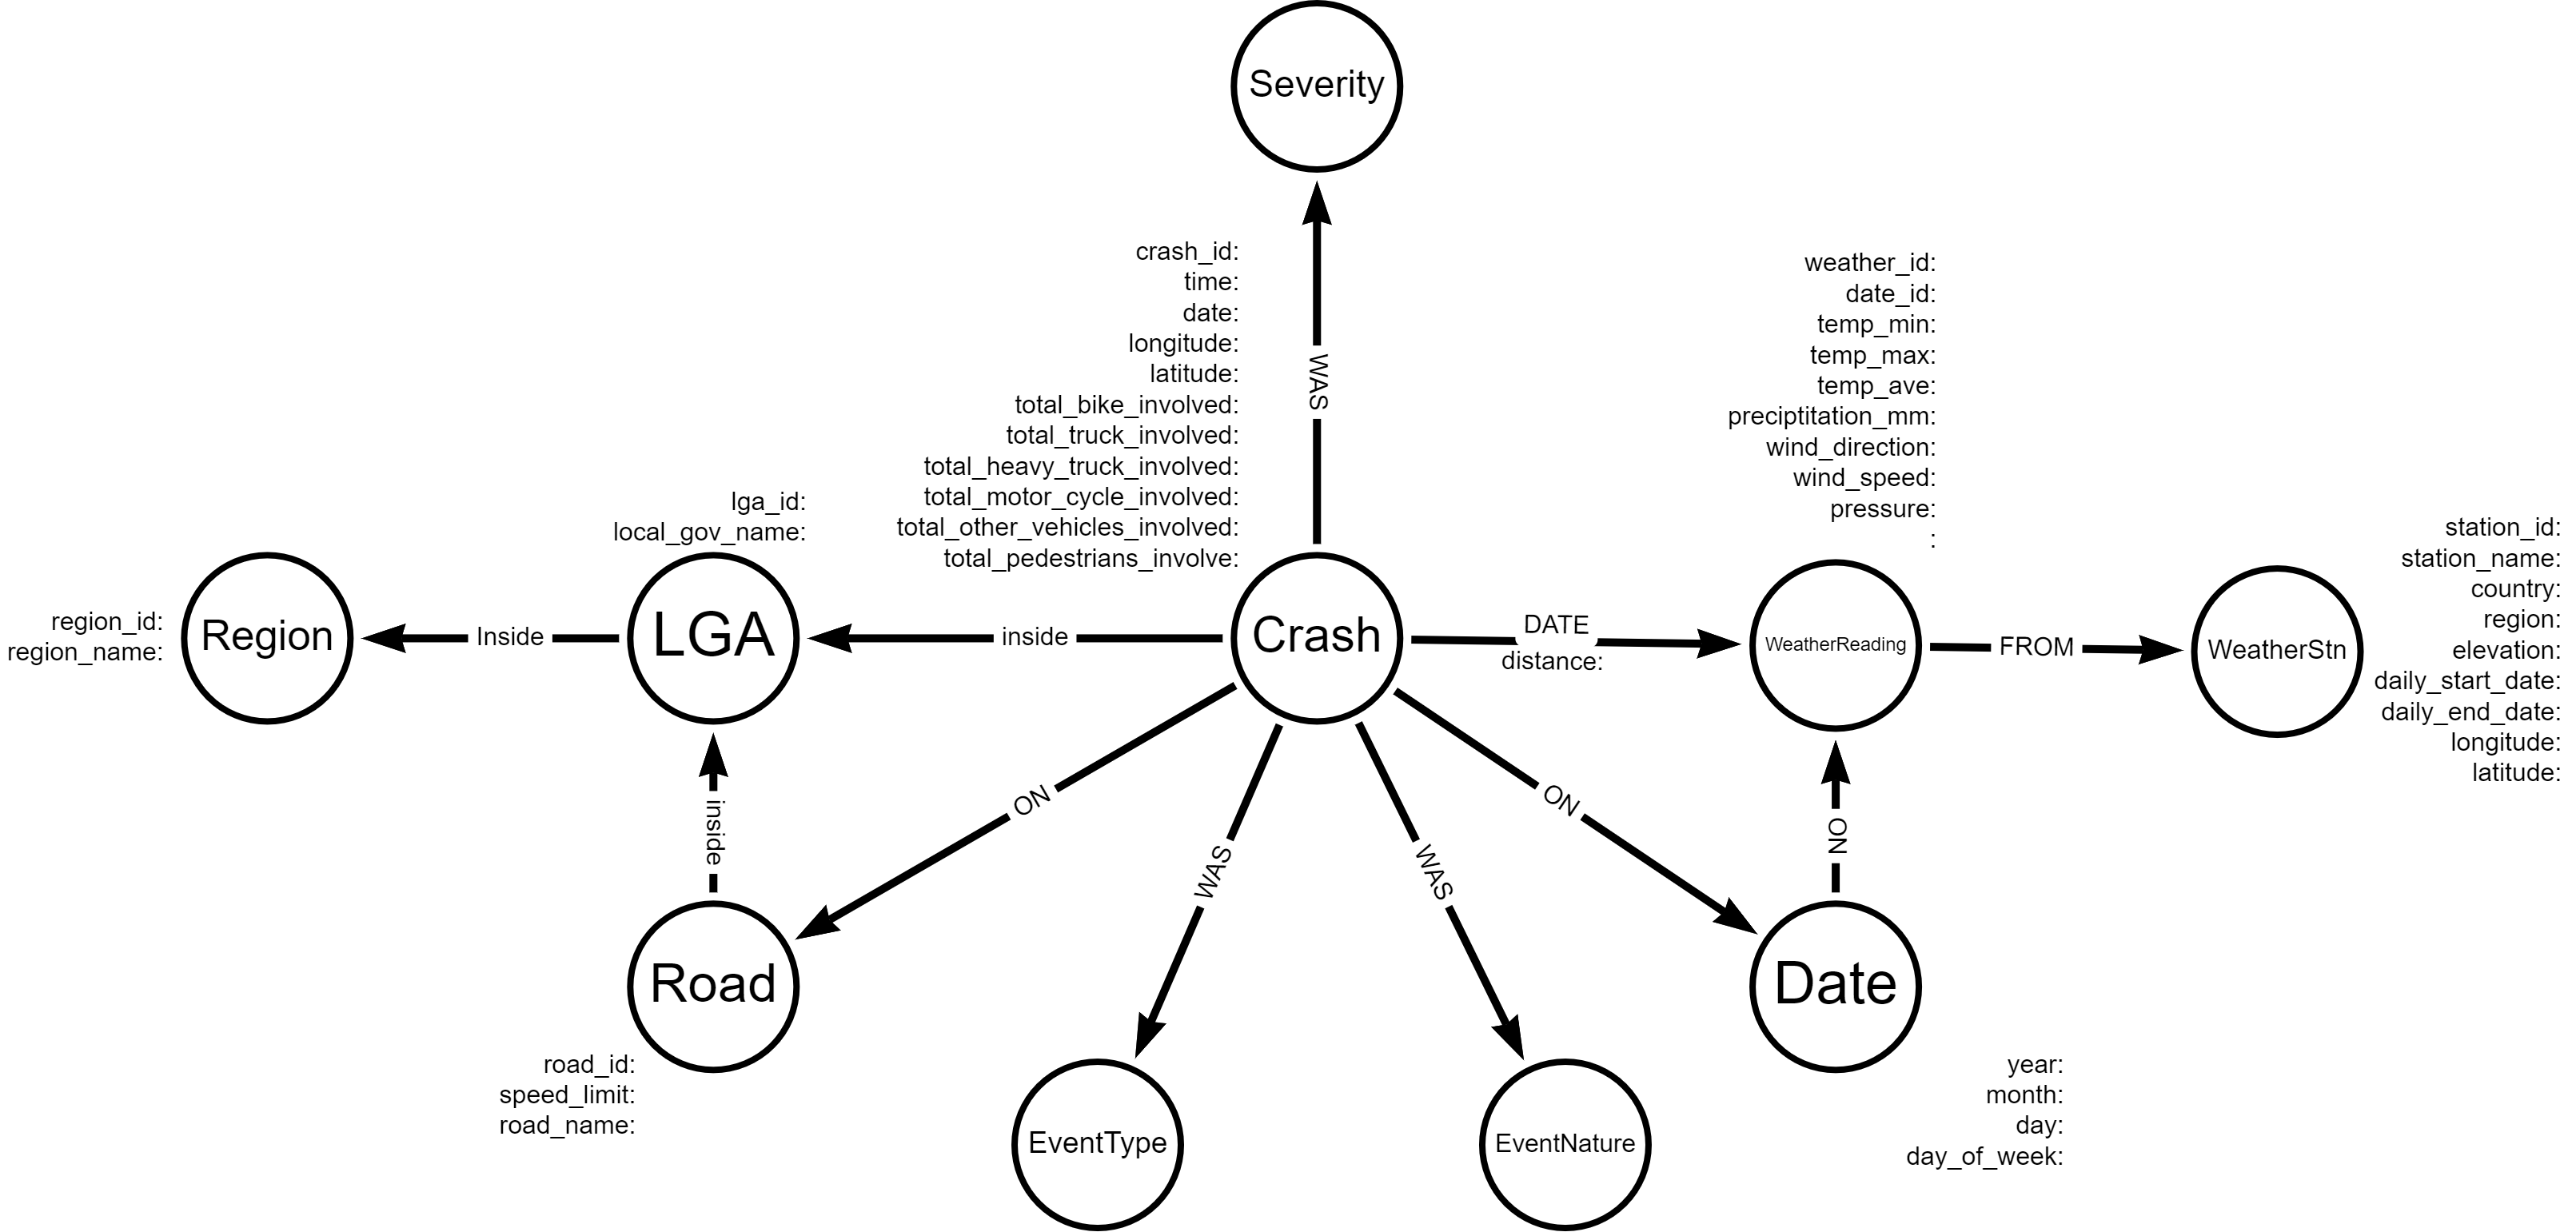

In [65]:
from IPython import display
display.Image("./images/Graph_Design.png")

## Neo4j Query Creation Functions 

In [52]:
if functions_to_run.neo4j:
    
    ## resets query text files
    def reset_queries_file():
        with open('./queries/create_nodes_queries.txt', 'w') as f:
            f.write("// Create Nodes Functions\n\n")
        with open('./queries/create_relations_queries.txt', 'w') as f:
            f.write("// Create Relationships Functions \n\n")

    ## Appends queries to text files
    def append_to_queries_file(query_file_path, query):
        with open(query_file_path, 'a') as f:
            f.write(query)

    ## Creates neo4j_csv_and_queries
    def create_node4j_csv(node_name:str , df: pd.DataFrame , table_data: list , relationships: list , drop_nas=True):
        ## Filter dataframe to only values
        df = df[[input[0] for input in table_data if str(input[0]).find("FOREIGN KEY") == -1]]
        ## Get type values 
        types = [input[1] for input in table_data if str(input[0]).find("FOREIGN KEY") == -1]
        ## Remove Duplicates & Nulls
        df.drop_duplicates(inplace=True , subset=table_data[0][0])
        if drop_nas:
            df.dropna(inplace=True)
        csv_path ="./csv/{0}.csv".format(node_name) 
        ## Create csv
        df.to_csv(csv_path, index=False)
        ## Create required Neo4J queries
        create_queries(df, types , node_name , relationships)

    ## Creates the property string with types 
    def property_string_creator(prop_name , type_string: str):
        if type_string.find("int") != -1:
            return " n.{0} = toInteger(row.{0})".format(prop_name)
        elif type_string.find("float") != -1:
            return " n.{0} = toFloat(row.{0})".format(prop_name)
        elif type_string.find("time") != -1:
            return " n.{0} = Datetime(row.{0})".format(prop_name)
        elif type_string.find("date") != -1:
            return " n.{0} = date(row.{0})".format(prop_name)
        else:
            return " n.{0} = row.{0}".format(prop_name)

    ## Creates a create node query from inputs
    def query_create_nodes(node_name:str , node_id:str ):
        return "// Create {0}\nLOAD CSV WITH HEADERS FROM 'file:///{0}.csv' AS row\nMERGE (n:{1} {{ {2}: row.{2} }});\n\n\n".format(
            node_name,
            node_name,
            node_id,
        )

    ## Creates a create node query from inputs
    def query_create_nodes_w_props(node_name:str , node_id:str, node_properties: str ):
        return "// Create {0}\nLOAD CSV WITH HEADERS FROM 'file:///{0}.csv' AS row\nMERGE (n:{1} {{ {2}: row.{2} }})\nON CREATE SET{3};\n\n\n".format(
            node_name,
            node_name,
            node_id,
            node_properties, 
        )
   
    ## Creates a relationship query from inputs
    def query_create_node_relationships(csv_file_name , nodes , node_ids, edge_name , from_base):
        ## Extract key information 
        base_id = str(node_ids[0])
        edge_node_id = str(node_ids[1])
        base_node = str(nodes[0])
        edge_node = str(nodes[1])
        ## format loading string 
        load_string = "// Create relationships between {0} and {1}\nLOAD CSV WITH HEADERS FROM 'file:///{2}.csv' AS row\n".format(
            base_node,
            edge_node, 
            csv_file_name
        )
        ## format match strings
        match_string = "MATCH ({0}:{2} {{ {4}: row.{4} }})\nMATCH ({1}:{3}  {{ {5}: row.{5} }})\n".format(
            base_node.lower(),
            edge_node.lower(),
            base_node,
            edge_node,
            base_id,
            edge_node_id, 
        )
        ## format merge string using direction input 
        merge_string = ""
        if from_base:
            merge_string = "MERGE ({0})-[:{2}]->({1});\n\n\n".format(base_node.lower(), edge_node.lower() ,edge_name)
        else:
            merge_string = "MERGE ({0})<-[:{2}]-({1});\n\n\n".format(base_node.lower(), edge_node.lower() ,edge_name)
        ## join & return string 
        query = load_string + match_string + merge_string
        return query 

    ## Create required Neo4J queries
    def create_queries(df:pd.DataFrame, types: list,  node_name: str , relationships: list ):
        ## establish key variables 
        node_id = ""
        prop_strings = []
        for index, name in enumerate(df.columns):
                if index == 0:
                    ## get df index value 
                    node_id = name
                else:
                    ## check to ensure field is not an id
                    if str(name).find("_id") == -1:
                        ## if not get type string & create property string 
                        type_string = property_string_creator(name, types[index])
                        prop_strings.append(type_string)
        if len(prop_strings) == 0:
            query = query_create_nodes(node_name, node_id)
        else:
            ## Join property strings 
            node_properties = ", ".join(prop_strings)
            ## generate create query for node 
            query = query_create_nodes_w_props(node_name, node_id, node_properties)
        ## add create query to txt file 
        append_to_queries_file('./queries/create_nodes_queries.txt' , query)
        ## Loop through relations 
        for relationship in relationships:
            ## Get relationship information 
            nodes = [node_name , relationship[0]]
            node_ids = [node_id , relationship[1]]
            edge_name = relationship[2]
            from_base = relationship[3]
            ## generate relationship query
            query = query_create_node_relationships(node_name, nodes, node_ids , edge_name , from_base )
            ## add relationship query to text file 
            append_to_queries_file('./queries/create_relations_queries.txt' , query)

## Subset data for speed of queries 

In [43]:
if functions_to_run.subset_data:
    subset_data = merged_df.tail(10000)
    print("Redced Dataframe to {} rows".format(len(subset_data)))

Redced Dataframe to 10000 rows


## Map data & Generate Queries 

In [68]:
if functions_to_run.neo4j:
    
    ## Reset query files 
    reset_queries_file()

    ######################### Nodes #########################
    ## Crash 
    table_data = [
        ["event_id", "string"],
        ["date_id", "string"],
        ["weather_id", "string"],
        ["lga_id", "string"],
        ["road_id", "string"],
        ["time_id", "string"],
        ["event_nature", "string"],
        ["event_type", "string"],
        ["severity", "string"],
        ["longitude", "float"],
        ["latitude", "float"],
        ["total_bike_involved", "int"],
        ["total_truck_involved", "int"],
        ["total_heavy_truck_involved", "int"],
        ["total_motor_cycle_involved", "int"],
        ["total_other_vehicles_involved", "int"],
        ["total_pedestrians_involve", "int"],
    ]
    relationships = [
        # Node , Node ids, Edge Name , Direction Is From Base Node)
        ["Date" , "date_id", "ON" , True], 
        ["EventType" , "event_type", "WAS" , True], 
        ["EventNature" , "event_nature", "WAS" , True], 
        ["Severity" , "severity", "WAS" , True], 
        ["LGA" , "lga_id", "IN" , True],
        ["Road" , "road_id","ON" , True],
        ["WeatherReading" , "weather_id","READING" , True],
    ]
    create_node4j_csv( "Crash" , subset_data , table_data, relationships, drop_nas=False)

    ## Date 
    table_data = [
        ["date_id", "date"],
        ["year", "int"],
        ["month", "string"],
        ["day", "string"],
        ["quarter", "int"],
        ["day_of_week", "string"],
    ]
    relationships = []
    create_node4j_csv( "Date" , subset_data  , table_data , relationships )

    ## Weather Station 
    table_data = [
        ["station_id", "string"],
        ["station_name", "string"],
        ["country", "string"],
        ["region", "string"],
        ["elevation", "int"],
        ["daily_start_date", "string"],
        ["daily_end_date", "string"],
        ["longitude", "float"],
        ["latitude", "float"],
    ]
    relationships = []
    create_node4j_csv( "WeatherStn" , station_dfs , table_data , relationships, drop_nas=False)

    ## Road
    table_data = [
        ["road_id", "string"],
        ["road_name", "string"],
        ["common_road_name", "string" ],
        ["cway", "string"],
        ["speed_limit", "string"],
        ["network_type", "string"],
    ]
    relationships = [] 
    create_node4j_csv(  "Road" , subset_data  , table_data , relationships)

    ## LGA
    table_data = [
        ["lga_id", "string"],
        ["local_gov_name", "string"],
    ]
    relationships = [
        ["Region" , "region_id", "inside" , True], 
    ]
    create_node4j_csv(  "LGA" , subset_data , table_data, relationships )

    ## Region
    table_data = [
        ["region_id", "string"],
        ["region_name", "string"],
    ]
    relationships = []
    create_node4j_csv(  "Region" , subset_data , table_data, relationships )

    ## Weather Reading
    table_data = [
        ["weather_id", "string"],
        ["date_id", "string"],
        ["station_id", "string"],
        ["temp_min", "float"],
        ["temp_ave", "float"],
        ["temp_max", "float"],
        ["precipitation_mm", "float"],
        ["wind_direction", "float"],
        ["wind_speed", "float"],
        ["pressure", "float"],
        ["distance", "int"],
    ]
    relationships = [
        ["Date" , "date_id", "ON" , True], 
        ["WeatherStn" , "station_id", "FROM" , True], 
    ]
    create_node4j_csv( "WeatherReading" , subset_data , table_data, relationships , drop_nas=False)

    ## EventType 
    table_data = [
        ["event_type", "string"],
    ]
    relationships = []
    create_node4j_csv( "EventType" , subset_data  , table_data , relationships )
    
    ## EventNature 
    table_data = [
        ["event_nature", "string"],
    ]
    relationships = []
    create_node4j_csv( "EventNature" , subset_data  , table_data , relationships )

    ## Severity 
    table_data = [
        ["severity", "string"],
    ]
    relationships = []
    create_node4j_csv( "Severity" , subset_data  , table_data , relationships )

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

## Copy Files to Imports Folder

In [70]:
if functions_to_run.neo4j:
    import os , shutil
    imports_location = r"C:\Users\david\.Neo4jDesktop\relate-data\dbmss\dbms-16f9438d-81f0-4d63-ad67-7d8437cd360c\import"
    local_csv_location = "./csv"

    ## Remove all files in the Neo4j imports folder 
    def clean_imports_file(directory):   
        for filename in os.listdir(directory):
            file = os.path.join(directory, filename)
            if os.path.isfile(file):
                os.remove(file)
                print(filename , " Deleted")
    
    ## Copies the created csv files to the Neo4j imports folder 
    def copy_csv_to_imports_folder(sources_dir, copy_location):
        # return "not implemented"
        for filename in os.listdir(sources_dir):
            file = os.path.join(sources_dir, filename)
            if os.path.isfile(file):
                shutil.copy(file, copy_location)
                print('copied', filename)
                
    clean_imports_file(imports_location)
    copy_csv_to_imports_folder(local_csv_location, imports_location)

WeatherReading.csv  Deleted
WeatherStn.csv  Deleted
copied Crash.csv
copied Date.csv
copied EventNature.csv
copied EventType.csv
copied LGA.csv
copied Location.csv
copied Region.csv
copied Road.csv
copied Severity.csv
copied Weather.csv
copied WeatherReading.csv
copied WeatherStn.csv


# Cypher Queries 

For this section I have replaced job terms with their closest reference in the crash dataset. Some of the queries have been further altered to make more sense with respect to the chosen dataset. 

## Write Cypher queries to answer the following questions:
- **How many crashes are of a given crash type in a specified local government?**
    ```
    MATCH (s:Severity)<-[:WAS]-(n:Crash)-[:IN]->(p:LGA {local_gov_name: "Belmont (C)"})
    RETURN s.severity AS severity, COUNT(*) AS Crashes;
    ```

    Return:
    ```
    ╒═══════════╤═════════════╕
    │"severity" │"Crashes"    │
    ╞═══════════╪═════════════╡
    │"PDO Major"│27           │
    ├───────────┼─────────────┤
    │"PDO Minor"│22           │
    ├───────────┼─────────────┤
    │"Medical"  │3            │
    └───────────┴─────────────┘
    ```


- **Find crashes that share the same crash type.**
    ```
    MATCH (n:Crash)-[r:WAS]->(p:EventType {event_type: "Involving Overtaking"})
    RETURN n, r, p
    ```

    Response (sample):
    ```
    ╒══════════════════════════════════════════════════════════════════════╤═══╤═════════════════════════════════════╕
    │"n"                                                                   │"r"│"p"                                  │
    ╞══════════════════════════════════════════════════════════════════════╪═══╪═════════════════════════════════════╡
    │{"total_pedestrians_involve":0,"severity":"PDO Major","event_nature":"│{} │{"event_type":"Involving Overtaking"}│
    │Sideswipe Same Dirn","event_type":"Involving Overtaking","event_id":"1│   │                                     │
    │32319","latitude":-31.600145,"total_bike_involved":0,"total_truck_invo│   │                                     │
    │lved":0,"total_heavy_truck_involved":0,"total_motor_cycle_involved":0,│   │                                     │
    │"total_other_vehicles_involved":0,"longitude":115.681653}             │   │                                     │
    ├──────────────────────────────────────────────────────────────────────┼───┼─────────────────────────────────────┤
    │{"total_pedestrians_involve":0,"severity":"PDO Minor","event_nature":"│{} │{"event_type":"Involving Overtaking"}│
    │Sideswipe Same Dirn","event_type":"Involving Overtaking","event_id":"1│   │                                     │
    │32359","latitude":-31.863972,"total_bike_involved":0,"total_truck_invo│   │                                     │
    │lved":0,"total_heavy_truck_involved":0,"total_motor_cycle_involved":0,│   │                                     │
    │"total_other_vehicles_involved":0,"longitude":115.808358}             │   │                                     │
    ├──────────────────────────────────────────────────────────────────────┼───┼─────────────────────────────────────┤

    ```

    Counting number of crash types 
    ```
    MATCH (n:Crash)
    RETURN n.event_type AS event_type, COUNT(*) AS Crashes;
    ```


    Response: 
    ```
    ╒═════════════════════════════╤═════════════╕
    │"event_type"                 │"Crashes"    │
    ╞═════════════════════════════╪═════════════╡
    │"Involving Animal"           │246          │
    ├─────────────────────────────┼─────────────┤
    │"Involving Overtaking"       │741          │
    ├─────────────────────────────┼─────────────┤
    │"Involving Parking"          │410          │
    ├─────────────────────────────┼─────────────┤
    │"Entering / Leaving Driveway"│613          │
    ├─────────────────────────────┼─────────────┤
    │"Involving Pedestrian"       │97           │
    └─────────────────────────────┴─────────────┘
    ```

- **Find all different crash types for each local governments.**

    ```
    MATCH (lga:LGA)<-[:IN]-(c:Crash)-[:WAS]->(t:EventType)
    RETURN lga.local_gov_name as LGA ,  t.event_type as type, count(*) as Crashes 
    ORDER BY Crashes DESC
    ```

    Sample Response: 
    ```
    ╒══════════════════════════╤═════════════════════════════╤═════════╕
    │"LGA"                     │"type"                       │"Crashes"│
    ╞══════════════════════════╪═════════════════════════════╪═════════╡
    │"Stirling (C)"            │"Entering / Leaving Driveway"│75       │
    ├──────────────────────────┼─────────────────────────────┼─────────┤
    │"Stirling (C)"            │"Involving Overtaking"       │72       │
    ├──────────────────────────┼─────────────────────────────┼─────────┤
    │"Perth (C)"               │"Involving Overtaking"       │62       │
    ├──────────────────────────┼─────────────────────────────┼─────────┤
    │"Canning (C)"             │"Involving Overtaking"       │49       │
    ├──────────────────────────┼─────────────────────────────┼─────────┤
    ```


- **Find crashes based on the presence of a cyclist.** 
    ```
    MATCH (n:Crash )
    WHERE n.total_bike_involved > 0
    RETURN n
    ```

    Sample Response: 
    ```
    ╒══════════════════════════════════════════════════════════════════════╕
    │"n"                                                                   │
    ╞══════════════════════════════════════════════════════════════════════╡
    │{"total_pedestrians_involve":0,"severity":"Medical","event_nature":"Si│
    │deswipe Same Dirn","event_type":"Involving Overtaking","event_id":"122│
    │851","latitude":-32.031752,"total_bike_involved":1,"total_truck_involv│
    │ed":0,"total_heavy_truck_involved":0,"total_motor_cycle_involved":0,"t│
    │otal_other_vehicles_involved":1,"longitude":115.747384}               │
    ├──────────────────────────────────────────────────────────────────────┤
    │{"total_pedestrians_involve":0,"severity":"Medical","event_nature":"Ri│
    │ght Angle","event_type":"Entering / Leaving Driveway","event_id":"1229│
    │21","latitude":-32.276304,"total_truck_involved":0,"total_bike_involve│
    │d":1,"total_heavy_truck_involved":0,"total_motor_cycle_involved":0,"to│
    │tal_other_vehicles_involved":1,"longitude":115.72863}                 │
    ├──────────────────────────────────────────────────────────────────────┤
    ```


- **Find crashes posted during a specified period of time (2017-2019).** 
    Number of crashes for each month between 2017 & 2918

    ```
    MATCH (n:Crash)-[r:ON]->(d:Date)
    WHERE 2016< d.year < 2019
    WITH d.year + "-" + d.month as date_value , n
    RETURN distinct(date_value) as Date, count(n) as Crashes ORDER BY Date
    ```
    sample Response: 
    ```
    ╒═════════╤═════════╕
    │"Date"   │"Crashes"│
    ╞═════════╪═════════╡
    │"2017-01"│10       │
    ├─────────┼─────────┤
    │"2017-02"│4        │
    ├─────────┼─────────┤
    │"2017-03"│11       │
    ├─────────┼─────────┤
    │"2017-04"│7        │
    ├─────────┼─────────┤
    │"2017-05"│8        │
    ├─────────┼─────────┤
    ```
   
    - **Count By Month** 
    ```
    MATCH (n:Crash)-[r:ON]->(d:Date)
    RETURN distinct(d.month) as Month, count(n) as Crashes ORDER BY Month
    ```
    Response: 
    ```
    ╒═══════╤═════════╕
    │"Month"│"Crashes"│
    ╞═══════╪═════════╡
    │"01"   │50       │
    ├───────┼─────────┤
    │"02"   │39       │
    ├───────┼─────────┤
    │"03"   │56       │
    ├───────┼─────────┤
    │"04"   │55       │
    ├───────┼─────────┤
    │"05"   │58       │
    ├───────┼─────────┤
    │"06"   │62       │
    ├───────┼─────────┤
    │"07"   │51       │
    ├───────┼─────────┤
    │"08"   │69       │
    ├───────┼─────────┤
    │"09"   │222      │
    ├───────┼─────────┤
    │"10"   │340      │
    ├───────┼─────────┤
    │"11"   │521      │
    ├───────┼─────────┤
    │"12"   │584      │
    └───────┴─────────┘
    ```

### Write Cypher queries for at least two other meaningful queries that you can think of.

- **What local government region has the most Major crashes?** 
    ```
    MATCH (s:Severity {severity: "PDO Major"})<-[:WAS]-(n:Crash)-[:IN]->(p:LGA)
    RETURN p.local_gov_name as LGA, COUNT(*) AS FatalCrashes
    ORDER BY FatalCrashes DESC
    limit 5;
    ```

    Response: 
    ```
    ╒══════════════╤══════════════╕
    │"LGA"         │"FatalCrashes"│
    ╞══════════════╪══════════════╡
    │"Stirling (C)"│105           │
    ├──────────────┼──────────────┤
    │"Perth (C)"   │68            │
    ├──────────────┼──────────────┤
    │"Canning (C)" │54            │
    ├──────────────┼──────────────┤
    │"Cockburn (C)"│53            │
    ├──────────────┼──────────────┤
    │"Melville (C)"│50            │
    └──────────────┴──────────────┘
    ```
- **How many crashes occurred on rainy days?** 
    
    ```
    MATCH (n:Crash)-[r:READING]->(w:WeatherReading)
    WHERE w.precipitation_mm > 0
    RETURN count(n) as number_of_crashes
    ```
    
    Response:
    ```
    ╒═══════════════════╕
    │"number_of_crashes"│
    ╞═══════════════════╡
    │2489               │
    └───────────────────┘
    ```

    Return those days & crashes 
    
    ```
    MATCH (n:Crash)-[r:READING]->(w:WeatherReading)
    WHERE w.precipitation_mm > 0
    RETURN n, r, w
    ```

    Sample Response: 
    ```
    ╒══════════════════════════════════════════════╤═══╤══════════════════════════════════════════════╕
    │"n"                                           │"r"│"w"                                           │
    ╞══════════════════════════════════════════════╪═══╪══════════════════════════════════════════════╡
    │{"total_pedestrians_involve":0,"severity":"PDO│{} │{"temp_ave":13.9,"temp_min":14.8,"weather_id":│
    │ Major","event_nature":"Right Angle","event_id│   │"94610_2021-10-01","wind_direction":313.0,"win│
    │":"131274","latitude":-31.941698,"total_truck_│   │d_speed":18.4,"pressure":1006.3,"temp_max":19.│
    │involved":0,"total_bike_involved":0,"total_hea│   │6,"precipitation_mm":3.0}                     │
    │vy_truck_involved":0,"total_motor_cycle_involv│   │                                              │
    │ed":0,"total_other_vehicles_involved":0,"longi│   │                                              │
    │tude":115.925635}                             │   │                                              │
    ├──────────────────────────────────────────────┼───┼──────────────────────────────────────────────┤
    │{"total_pedestrians_involve":0,"severity":"PDO│{} │{"temp_ave":13.9,"temp_min":14.8,"weather_id":│
    │ Minor","event_nature":"Sideswipe Same Dirn","│   │"94610_2021-10-01","wind_direction":313.0,"win│
    │event_type":"Involving Overtaking","event_id":│   │d_speed":18.4,"pressure":1006.3,"temp_max":19.│
    │"122844","latitude":-31.945757,"total_bike_inv│   │6,"precipitation_mm":3.0}                     │
    │olved":0,"total_truck_involved":0,"total_heavy│   │                                              │
    │_truck_involved":1,"total_motor_cycle_involved│   │                                              │
    │":0,"total_other_vehicles_involved":1,"longitu│   │                                              │
    │de":115.839168}                               │   │                                              │
    ├──────────────────────────────────────────────┼───┼──────────────────────────────────────────────┤
    ```

- **Number of crashes by Severity for each year.**

    ```
     MATCH (s:Severity)<-[:WAS]-(n:Crash)-[r:ON]->(d:Date)
     RETURN distinct(d.year) as Date, s.severity as sev, count(n) as Crashes 
     ORDER BY Date
    ```

    Response: 
    ```
    ╒══════╤═══════════╤═════════╕
    │"Date"│"sev"      │"Crashes"│
    ╞══════╪═══════════╪═════════╡
    │2017  │"PDO Major"│250      │
    ├──────┼───────────┼─────────┤
    │2017  │"PDO Minor"│176      │
    ├──────┼───────────┼─────────┤
    │2017  │"Medical"  │41       │
    ├──────┼───────────┼─────────┤
    │2017  │"Hospital" │21       │
    ├──────┼───────────┼─────────┤
    │2018  │"PDO Major"│321      │
    ├──────┼───────────┼─────────┤
    │2018  │"PDO Minor"│175      │
    ├──────┼───────────┼─────────┤
    │2018  │"Medical"  │84       │
    ├──────┼───────────┼─────────┤
    │2018  │"Hospital" │25       │
    ├──────┼───────────┼─────────┤
    │2019  │"PDO Major"│292      │
    ├──────┼───────────┼─────────┤
    │2019  │"PDO Minor"│204      │
    ├──────┼───────────┼─────────┤
    │2019  │"Medical"  │52       │
    ├──────┼───────────┼─────────┤
    │2019  │"Hospital" │26       │
    ├──────┼───────────┼─────────┤
    │2020  │"PDO Major"│310      │
    ├──────┼───────────┼─────────┤
    │2020  │"PDO Minor"│234      │
    ├──────┼───────────┼─────────┤
    │2020  │"Medical"  │39       │
    ├──────┼───────────┼─────────┤
    │2020  │"Hospital" │24       │
    ├──────┼───────────┼─────────┤
    │2021  │"PDO Major"│4116     │
    ├──────┼───────────┼─────────┤
    │2021  │"PDO Minor"│2028     │
    ├──────┼───────────┼─────────┤
    │2021  │"Medical"  │1153     │
    ├──────┼───────────┼─────────┤
    │2021  │"Hospital" │404      │
    ├──────┼───────────┼─────────┤
    │2021  │"Fatal"    │25       │
    └──────┴───────────┴─────────┘
    ```

- **Number of crashes of an event type (Involving Overtaking) for each severity** 
    ```
    MATCH (s:Severity)<-[:WAS]-(n:Crash)-[:WAS]->(p:EventType {event_type: "Involving Overtaking"})
    RETURN s.severity AS severity, COUNT(*) AS num_crashes;
    ```

    Response: 
    ```
    ╒═══════════╤═════════════╕
    │"severity" │"num_crashes"│
    ╞═══════════╪═════════════╡
    │"PDO Minor"│292          │
    ├───────────┼─────────────┤
    │"PDO Major"│392          │
    ├───────────┼─────────────┤
    │"Medical"  │51           │
    ├───────────┼─────────────┤
    │"Hospital" │14           │
    ├───────────┼─────────────┤
    │"Fatal"    │1            │
    └───────────┴─────────────┘
    ```

- **How many pedestrians were involving in crashes by LGA?**
    ```
     MATCH (n:Crash)-[r:IN]->(l:LGA)
     WHERE n.total_pedestrians_involve > 0
     RETURN l.local_gov_name as local_gov , sum(n.total_pedestrians_involve) as number_of_crashes_involving_pedestrians
     ORDER BY number_of_crashes_involving_pedestrians DESC
     LIMIT 5;
    ```

    Response: 
    ```
    ╒══════════════╤═════════════════════════════════════════╕
    │"local_gov"   │"number_of_crashes_involving_pedestrians"│
    ╞══════════════╪═════════════════════════════════════════╡
    │"Stirling (C)"│13                                       │
    ├──────────────┼─────────────────────────────────────────┤
    │"Perth (C)"   │12                                       │
    ├──────────────┼─────────────────────────────────────────┤
    │"Wanneroo (C)"│8                                        │
    ├──────────────┼─────────────────────────────────────────┤
    │"Swan (C)"    │8                                        │
    ├──────────────┼─────────────────────────────────────────┤
    │"Vincent (C)" │8                                        │
    └──────────────┴─────────────────────────────────────────┘
    ```


- **How many Vehicles, bikes, Trucks, & pedestrians were involved in accidents by 10 local governments with the hights total number of crashes**

    ```
    MATCH (n:Crash)-[:IN]->(lga:LGA)
    RETURN lga.local_gov_name as LGA ,  
           sum(n.total_other_vehicles_involved) as total_other_vehicles , 
           sum(n.total_heavy_truck_involved) as total_heavy_trucks, 
           sum(n.total_bike_involved) as total_bikes, 
           sum(n.total_motor_cycle_involved) as total_motor_cycles,
           sum(n.total_pedestrians_involve) as total_pedestrians,
           sum(n.total_other_vehicles_involved + 
               n.total_heavy_truck_involved + 
               n.total_bike_involved + 
               n.total_motor_cycle_involved + 
               n.total_pedestrians_involve) as Total
    ORDER BY Total DESC
    Limit 5
    ```

    Response: 
    ```
    ╒══════════════╤══════════════════════╤════════════════════╤═════════════╤════════════════════╤═══════════════════╤═══════╕
    │"LGA"         │"total_other_vehicles"│"total_heavy_trucks"│"total_bikes"│"total_motor_cycles"│"total_pedestrians"│"Total"│
    ╞══════════════╪══════════════════════╪════════════════════╪═════════════╪════════════════════╪═══════════════════╪═══════╡
    │"Stirling (C)"│1205                  │6                   │14           │20                  │13                 │1258   │
    ├──────────────┼──────────────────────┼────────────────────┼─────────────┼────────────────────┼───────────────────┼───────┤
    │"Canning (C)" │625                   │3                   │9            │9                   │7                  │653    │
    ├──────────────┼──────────────────────┼────────────────────┼─────────────┼────────────────────┼───────────────────┼───────┤
    │"Swan (C)"    │582                   │9                   │6            │23                  │8                  │628    │
    ├──────────────┼──────────────────────┼────────────────────┼─────────────┼────────────────────┼───────────────────┼───────┤
    │"Cockburn (C)"│591                   │8                   │2            │13                  │5                  │619    │
    ├──────────────┼──────────────────────┼────────────────────┼─────────────┼────────────────────┼───────────────────┼───────┤
    │"Perth (C)"   │553                   │6                   │16           │17                  │12                 │604    │
    └──────────────┴──────────────────────┴────────────────────┴─────────────┴────────────────────┴───────────────────┴───────┘
    ```

- **Find the 10 closest accidents to the Perth Weather Stn that occurred on rainy days** 

    Using optional match as the station is used later in the query however we do not want to limit the nodes on this connection as not all stations have being applied through the API. 

    ```
    MATCH  (r:WeatherReading)<-[:READING]-(c:Crash)  OPTIONAL MATCH (stn:WeatherStn {station_name: "Mandurah"})
    Where r.precipitation_mm > 0
    WITH c ,
      point({latitude:stn.latitude, longitude:stn.longitude}) AS p1,
      point({latitude:c.latitude, longitude:c.longitude}) AS p2
    RETURN c
    ORDER BY  toInteger(point.distance(p1, p2)/1000) 
    Limit 10
    ```

    Sample Response: 
    
    ```
    ╒══════════════════════════════════════════════╕
    │"c"                                           │
    ╞══════════════════════════════════════════════╡
    │{"total_pedestrians_involve":0,"severity":"PDO│
    │ Major","event_nature":"Hit Object","event_id"│
    │:"129746","latitude":-32.523248,"total_truck_i│
    │nvolved":0,"total_bike_involved":0,"total_heav│
    │y_truck_involved":0,"total_motor_cycle_involve│
    │d":0,"total_other_vehicles_involved":0,"longit│
    │ude":115.729455}                              │
    ├──────────────────────────────────────────────┤
    │{"total_pedestrians_involve":0,"severity":"PDO│
    │ Minor","event_nature":"Hit Object","event_id"│
    │:"129938","latitude":-32.521671,"total_truck_i│
    │nvolved":0,"total_bike_involved":0,"total_heav│
    │y_truck_involved":0,"total_motor_cycle_involve│
    │d":0,"total_other_vehicles_involved":0,"longit│
    │ude":115.724282}                              │
    ├──────────────────────────────────────────────┤
    ```
